# **Visualização dos dados do SINAN (2007-2023) - Serpente**

# **Inicializando os dados**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [ ]:
!pip install -q gdown
import gdown

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=1UGrPGCw_wgOjoVPVHorx4KxumrCaD9UQ'
output = 'dados.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1UGrPGCw_wgOjoVPVHorx4KxumrCaD9UQ
To: /content/dados.csv
100%|██████████| 73.6M/73.6M [00:01<00:00, 52.4MB/s]


'dados.csv'

In [ ]:
df = pd.read_csv('dados.csv', sep=',', encoding='latin1')
df.head()

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,...,NU_AMPOL_1,NU_AMPOL_8,NU_AMPOL_6,NU_AMPOL_4,NU_AMPO_7,NU_AMPO_5,NU_AMPOL_9,NU_AMPOL_3,DOENCA_TRA,EVOLUCAO
0,2007-01-25,200704,2007,35,350280,1958.0,4048,M,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,2007-01-29,200705,2007,35,354850,1960.0,4046,M,6.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,NaN
2,2007-01-22,200704,2007,35,351660,NaN,4018,M,6.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,2007-01-25,200704,2007,35,351660,1967.0,4039,F,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
4,2007-01-03,200701,2007,35,351660,1988.0,4018,M,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0


In [ ]:
df.columns

Index(['DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT', 'ID_MUNICIP',
       'ANO_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA',
       'CS_ESCOL_N', 'ANT_DT_ACI', 'ANT_UF', 'ANT_MUNIC_', 'ANT_TEMPO_',
       'ANT_LOCA_1', 'TP_ACIDENT', 'ANI_TIPO_1', 'ANI_SERPEN', 'ANI_ARANHA',
       'ANI_LAGART', 'TRA_CLASSI', 'CON_SOROTE', 'NU_AMPOLAS', 'NU_AMPOL_1',
       'NU_AMPOL_8', 'NU_AMPOL_6', 'NU_AMPOL_4', 'NU_AMPO_7', 'NU_AMPO_5',
       'NU_AMPOL_9', 'NU_AMPOL_3', 'DOENCA_TRA', 'EVOLUCAO'],
      dtype='object')

In [ ]:
df = df[df['TP_ACIDENT'] == 1]

# **Gerando visualizações gerais**

## Número de casos ao longo do tempo

### Número de acidentes por ano

In [ ]:
ano_abs = pd.crosstab(index=df['NU_ANO'], columns='Frequência').reset_index()
ano_abs

col_0,NU_ANO,Frequência
0,2007,1452
1,2008,1696
2,2009,1882
3,2010,1744
4,2011,1900
5,2012,1895
6,2013,1757
7,2014,1864
8,2015,1870
9,2016,1743


In [ ]:
fig = px.line(ano_abs, x='NU_ANO', y='Frequência', markers=True,
              labels={'NU_ANO': 'Ano', 'Frequência': 'Número de Acidentes'},
              title='Número de Acidentes por Ano',
              color_discrete_sequence=px.colors.qualitative.Safe,
              text=ano_abs['Frequência'])

# Adicionar valores nos pontos
fig.update_traces(text=ano_abs['Frequência'], textposition="top center")

# Ajustar layout
fig.update_layout(xaxis=dict(dtick=1), yaxis_title="Número de Acidentes", xaxis_title="Ano")

# Exibir o gráfico
fig.show()

In [ ]:
df['EVOLUCAO'] = pd.to_numeric(df['EVOLUCAO'], errors='coerce').astype('Int64')
df_obitos = df[df['EVOLUCAO'] == 2]

ano_abs_obitos = pd.crosstab(index=df_obitos['NU_ANO'], columns='Frequência').reset_index()
ano_abs_obitos

col_0,NU_ANO,Frequência
0,2007,6
1,2008,2
2,2009,3
3,2010,1
4,2011,10
5,2012,6
6,2013,1
7,2014,3
8,2015,8
9,2016,8


In [ ]:
fig = px.line(ano_abs_obitos, x='NU_ANO', y='Frequência', markers=True,
              labels={'NU_ANO': 'Ano', 'Frequência': 'Número de Óbitos'},
              title='Número de Óbitos por Ano',
              color_discrete_sequence=px.colors.qualitative.Safe,
              text=ano_abs_obitos['Frequência'],

    )

# Adicionar valores nos pontos
fig.update_traces(text=ano_abs_obitos['Frequência'], textposition="top center")

# Ajustar layout
fig.update_layout(xaxis=dict(dtick=1), yaxis_title="Número de Óbitos", xaxis_title="Ano")

# Exibir o gráfico
fig.show()

In [ ]:
ano_abs_obitos['Percentual'] = ano_abs_obitos['Frequência']*100 / ano_abs['Frequência']
ano_abs_obitos['Label'] = ano_abs_obitos['Percentual'].map(lambda x: f'{x :.3f}%')

ano_abs_obitos

col_0,NU_ANO,Frequência,Percentual,Label
0,2007,6,0.413223,0.413%
1,2008,2,0.117925,0.118%
2,2009,3,0.159405,0.159%
3,2010,1,0.057339,0.057%
4,2011,10,0.526316,0.526%
5,2012,6,0.316623,0.317%
6,2013,1,0.056915,0.057%
7,2014,3,0.160944,0.161%
8,2015,8,0.427807,0.428%
9,2016,8,0.458979,0.459%


In [ ]:
# Calcular proporção de óbitos em relação aos acidentes
ano_abs_obitos['Percentual'] = ano_abs_obitos['Frequência']*100 / ano_abs['Frequência']

# Criar a figura
fig = go.Figure()

# Acidentes em barras
fig.add_trace(go.Bar(
    x=ano_abs['NU_ANO'],
    y=ano_abs['Frequência'],
    name='Acidentes',
    marker_color=px.colors.qualitative.Safe[0],
    text=ano_abs['Frequência'],
    textposition='outside',
    yaxis='y'
))

# Óbitos em proporção (linha)
fig.add_trace(go.Scatter(
    x=ano_abs_obitos['NU_ANO'],
    y=ano_abs_obitos['Percentual'],
    name='Óbitos ',
    mode='lines+markers+text',
    text=ano_abs_obitos['Label'],
    textposition='top center',
    line=dict(color=px.colors.qualitative.Safe[1], width=3),
    marker=dict(size=8),
    yaxis='y2'
))

# Layout com eixo y2 ajustado para proporção (0 a 1)
fig.update_layout(
    title='Acidentes com Animais Peçonhentos e Percentual de Óbitos em SP (2007–2023)',
    xaxis=dict(title='Ano', dtick=1, showgrid=True),  # grade ativada
    yaxis=dict(title='Número de Acidentes', showgrid=True),  # grade ativada
    yaxis2=dict(
        title='Óbitos Relativo ao Acidentes (%)',
        overlaying='y',
        side='right',
        showgrid=True,  # grade ativada
        range=[0, 1]
    ),
    legend=dict(
        title='Indicador',
        orientation='v',
        x=1,
        y=1,
        xanchor='right',
        yanchor='top'
    ),
    barmode='group',
    template='plotly_white'
)


fig.show()


### Número de acidentes por semana epidemiológica


In [ ]:
# Removendo espaços em branco, preenchendo valores vazios com '00' e mantendo os dois últimos dígitos
df['SEM_NOT'] = (
    df['SEM_NOT']
    .astype(str)
    .str.strip()               # Remove espaços em branco
    .replace('', '00')          # Substitui valores vazios por '00'
    .str[-2:]                   # Mantém apenas os dois últimos dígitos
    .astype(int)                # Converte de volta para inteiro
)

display(df)

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,...,NU_AMPOL_1,NU_AMPOL_8,NU_AMPOL_6,NU_AMPOL_4,NU_AMPO_7,NU_AMPO_5,NU_AMPOL_9,NU_AMPOL_3,DOENCA_TRA,EVOLUCAO
1,2007-01-29,5,2007,35,354850,1960.0,4046,M,6.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,<NA>
5,2007-01-22,4,2007,35,351870,1978.0,4028,F,9.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1
6,2007-01-15,3,2007,35,351870,NaN,4018,M,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1
8,2007-01-27,4,2007,35,351870,1991.0,4015,F,9.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1
9,2007-01-25,4,2007,35,351870,2000.0,4006,M,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538077,2023-12-31,1,2023,35,354360,1969.0,4054,M,6.0,1.0,...,NaN,NaN,0.0,NaN,NaN,4.0,0.0,0.0,2.0,1
538079,2023-12-31,1,2023,35,352460,1996.0,4027,F,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1
538086,2023-12-31,1,2023,35,352990,2013.0,4010,F,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,<NA>
538087,2023-12-31,1,2023,35,351480,1985.0,4038,M,6.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1


In [ ]:
# Agrupando por ano e mês para contar o número de casos
filtered_data = df.groupby(["NU_ANO", "SEM_NOT"]).size().reset_index(name="Casos")

# Gráfico de barras simples para mostrar casos por ano e semana
fig = px.bar(
    filtered_data,
    x="SEM_NOT",
    y="Casos",
    color="NU_ANO",
    title="Casos por Ano e Semana de Notificação",
    labels={"SEM_NOT": "Semana de Notificação", "Casos": "Número de Casos", "NU_ANO":"Ano" },
    color_discrete_sequence=px.colors.qualitative.Safe
)
fig.show()

### Número de acidentes por mês

In [ ]:
# Extraindo o mês de 'DT_NOT' nas posições 5 e 6
df['MES'] = df['DT_NOTIFIC'].astype(str).str[5:7]

# Agrupando por ano e mês para contar o número de casos
filtered_data = df.groupby(["NU_ANO", "MES"]).size().reset_index(name="Casos")

# Gráfico de barras simples para mostrar casos por ano e mês
fig = px.bar(
    filtered_data,
    x="MES",
    y="Casos",
    color="NU_ANO",
    title="Casos por Ano e Mês de Notificação",
    labels={"MES": "Mês", "Casos": "Número de Casos", "NU_ANO": "Ano"},
    color_discrete_sequence=px.colors.qualitative.Safe
)
fig.show()


## Informações dos acidentes


### Aplicação de soro

In [ ]:
soro = pd.crosstab(index=df['CON_SOROTE'], columns='Frequência').reset_index()
soro

col_0,CON_SOROTE,Frequência
0,1.0,23421
1,2.0,7708
2,9.0,1938


In [ ]:
soro_legend = {
    1: "Sim",
    2: "Não",
    9: "Ignorado"
}

soro['Soro'] = soro['CON_SOROTE'].map(soro_legend)

# Gráfico de pizza
fig = px.pie(
    soro,
    names='Soro',
    values='Frequência',
    title='Aplicação de soroterapia',
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Mostrar porcentagem e rótulo dentro da fatia
fig.update_traces(textinfo='percent+label', textposition='inside')

fig.show()


In [ ]:
df_obt = df.copy()
df_obt = df_obt[df_obt['EVOLUCAO'] == 2]
soro_obt = pd.crosstab(index=df_obt['CON_SOROTE'], columns='Frequência').reset_index()
soro_obt

col_0,CON_SOROTE,Frequência
0,1.0,90
1,2.0,9
2,9.0,1


In [ ]:
soro_obt['Percentual'] = (soro_obt['Frequência'] / soro['Frequência']) * 100
soro_obt['Label'] = soro_obt['Percentual'].apply(lambda x: f'{x:.3f}%')
soro_obt['Soro'] = soro_obt['CON_SOROTE'].map(soro_legend)
soro_obt

col_0,CON_SOROTE,Frequência,Percentual,Label,Soro
0,1.0,90,0.384271,0.384%,Sim
1,2.0,9,0.116762,0.117%,Não
2,9.0,1,0.051600,0.052%,Ignorado


In [ ]:
# Gráfico de pizza
fig = px.pie(
    soro_obt,
    names='Soro',
    values='Frequência',
    title='Percentual de mortes e soroterapia',
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Mostrar porcentagem e rótulo dentro da fatia
fig.update_traces(textinfo='percent+label', textposition='inside')

fig.show()

### Tempo de atendimento

In [ ]:
tempo = pd.crosstab(index=df['ANT_TEMPO_'], columns='Frequência').reset_index()
tempo

col_0,ANT_TEMPO_,Frequência
0,1.0,16265
1,2.0,8795
2,3.0,3114
3,4.0,950
4,5.0,746
5,6.0,949
6,9.0,1582


In [ ]:
tempo_dict = {
    1: '0 - 1h',
    2: '1 - 3h',
    3: '3 - 6h',
    4: '6 - 12h',
    5: '12 - 24h',
    6: '24h ou mais',
    9: 'Ignorado'
}

tempo['Tempo'] = tempo['ANT_TEMPO_'].map(tempo_dict)
tempo

col_0,ANT_TEMPO_,Frequência,Tempo
0,1.0,16265,0 - 1h
1,2.0,8795,1 - 3h
2,3.0,3114,3 - 6h
3,4.0,950,6 - 12h
4,5.0,746,12 - 24h
5,6.0,949,24h ou mais
6,9.0,1582,Ignorado


In [ ]:
# Gráfico de pizza
fig = px.pie(
    tempo,
    names='Tempo',
    values='Frequência',
    title='Número de casos por tempo de atendimento',
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Mostrar porcentagem e rótulo dentro da fatia
fig.update_traces(textinfo='percent+label', textposition='inside')

fig.show()

In [ ]:
df_obt = df.copy()
df_obt = df_obt[df_obt['EVOLUCAO'] == 2]
tempo_obt = pd.crosstab(index=df_obt['ANT_TEMPO_'], columns='Frequência').reset_index()
tempo['Óbitos'] = tempo_obt['Frequência']
tempo

col_0,ANT_TEMPO_,Frequência,Tempo,Óbitos
0,1.0,16265,0 - 1h,32
1,2.0,8795,1 - 3h,15
2,3.0,3114,3 - 6h,20
3,4.0,950,6 - 12h,6
4,5.0,746,12 - 24h,8
5,6.0,949,24h ou mais,12
6,9.0,1582,Ignorado,5


In [ ]:
tempo['Percentual'] = tempo['Óbitos'] * 100 / tempo['Frequência']
tempo['Label'] = tempo['Percentual'].apply(lambda x: f'{x:.3f}%')
tempo

col_0,ANT_TEMPO_,Frequência,Tempo,Óbitos,Percentual,Label
0,1.0,16265,0 - 1h,32,0.196741,0.197%
1,2.0,8795,1 - 3h,15,0.170551,0.171%
2,3.0,3114,3 - 6h,20,0.642261,0.642%
3,4.0,950,6 - 12h,6,0.631579,0.632%
4,5.0,746,12 - 24h,8,1.072386,1.072%
5,6.0,949,24h ou mais,12,1.264489,1.264%
6,9.0,1582,Ignorado,5,0.316056,0.316%


In [ ]:
# Gráfico de pizza
fig = px.pie(
    tempo,
    names='Tempo',
    values='Óbitos',
    title='Número de mortes por tempo de atendimento',
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Mostrar porcentagem e rótulo dentro da fatia
fig.update_traces(textinfo='percent+label', textposition='inside')

fig.show()

In [ ]:
fig = px.bar(
    tempo,
    x='Tempo',
    y='Percentual',
    title='Taxa de letalidade por tempo de espera',
    color_discrete_sequence=px.colors.qualitative.Safe
)

fig.show()

### Aplicação de soro e Tempo de espera

In [ ]:
# Filtrar valores onde ANT_TEMPO_ ≠ 9
#df_filtrado = df[df['ANT_TEMPO_'] != 9]
#df_filtrado = df_filtrado[df_filtrado['CON_SOROTE'] != 9]

# Gerar a crosstab com os valores válidos
#soro_tempo = pd.crosstab(df_filtrado['ANT_TEMPO_'], df_filtrado['CON_SOROTE'])
soro_tempo = pd.crosstab(df['ANT_TEMPO_'], df['CON_SOROTE'])
soro_tempo

CON_SOROTE,1.0,2.0,9.0
ANT_TEMPO_,,,
1.0,11440,3744,1081
2.0,6640,1796,359
3.0,2252,773,89
4.0,659,259,32
5.0,503,200,43
6.0,547,357,45
9.0,920,459,203


In [ ]:
# Renomear o índice (linhas) com tempo_dict
soro_tempo.index = soro_tempo.index.map(tempo_dict)

# Renomear as colunas com soro_dict
soro_tempo.columns = [soro_legend.get(col, col) for col in soro_tempo.columns]
soro_tempo

,Sim,Não,Ignorado
ANT_TEMPO_,,,
0 - 1h,11440,3744,1081
1 - 3h,6640,1796,359
3 - 6h,2252,773,89
6 - 12h,659,259,32
12 - 24h,503,200,43
24h ou mais,547,357,45
Ignorado,920,459,203


<Axes: title={'center': 'Administração de Soro por Tempo até o Atendimento'}, xlabel='ANT_TEMPO_'>

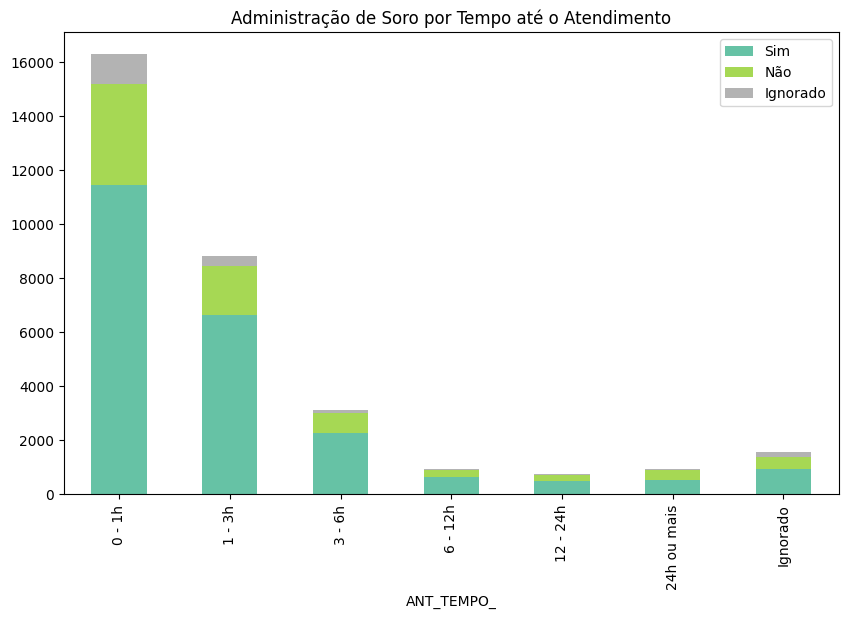

In [ ]:
soro_tempo.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2', title='Administração de Soro por Tempo até o Atendimento')

In [ ]:
percentual = soro_tempo.div(soro_tempo.sum(axis=1), axis=0) * 100

percentual_plot = percentual.reset_index().melt(id_vars='ANT_TEMPO_', var_name='Recebeu Soro', value_name='Percentual')

fig = px.bar(
    percentual_plot,
    x='ANT_TEMPO_',
    y='Percentual',
    color='Recebeu Soro',
    title='Percentual de Administração de Soro por Tempo até o Atendimento',
    text=percentual_plot['Percentual'].round(1).astype(str) + '%',
    barmode='stack',
    color_discrete_sequence=px.colors.qualitative.Safe
)
fig.update_traces(textposition='inside')
fig.show()


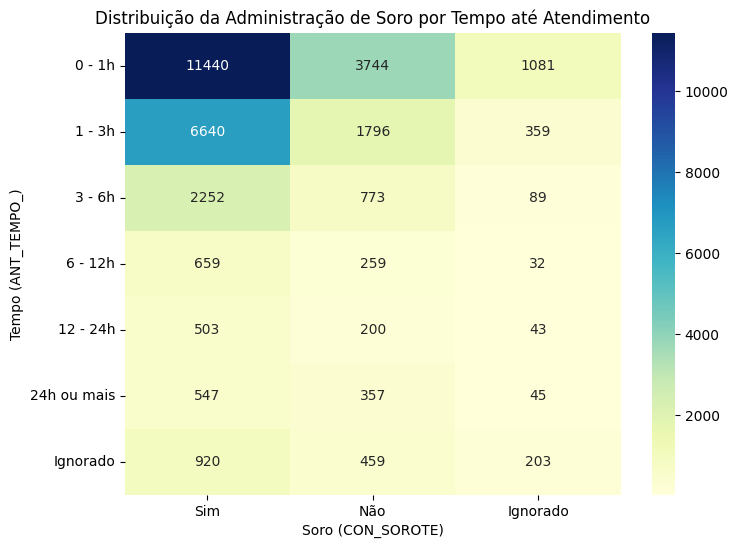

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(soro_tempo, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Distribuição da Administração de Soro por Tempo até Atendimento")
plt.ylabel("Tempo (ANT_TEMPO_)")
plt.xlabel("Soro (CON_SOROTE)")
plt.show()


In [ ]:
soro_tempo_N = pd.crosstab(df['ANT_TEMPO_'], df['CON_SOROTE'], normalize='index')
soro_tempo_N

CON_SOROTE,1.0,2.0,9.0
ANT_TEMPO_,,,
1.0,0.703351,0.230188,0.066462
2.0,0.754974,0.204207,0.040819
3.0,0.723186,0.248234,0.028581
4.0,0.693684,0.272632,0.033684
5.0,0.674263,0.268097,0.057641
6.0,0.576396,0.376185,0.047418
9.0,0.581542,0.290139,0.128319


<Axes: title={'center': 'Administração de Soro por Tempo até o Atendimento'}, xlabel='ANT_TEMPO_'>

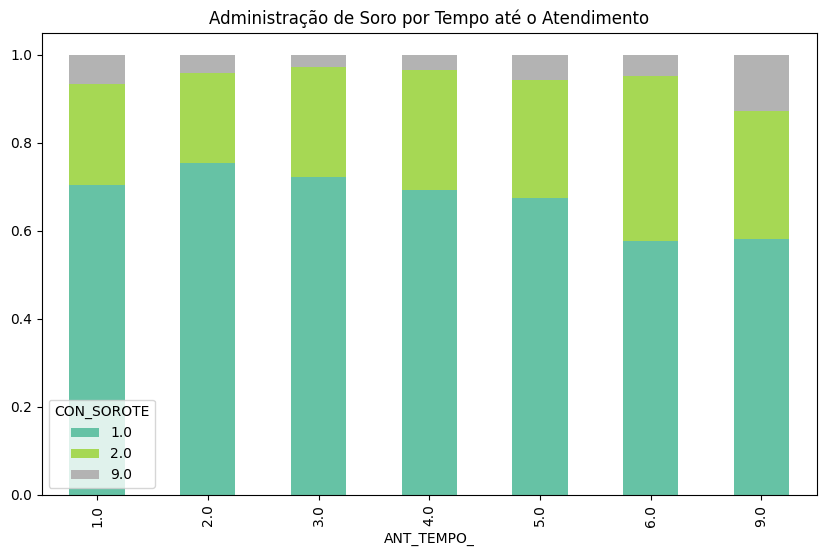

In [ ]:
soro_tempo_N.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2', title='Administração de Soro por Tempo até o Atendimento')

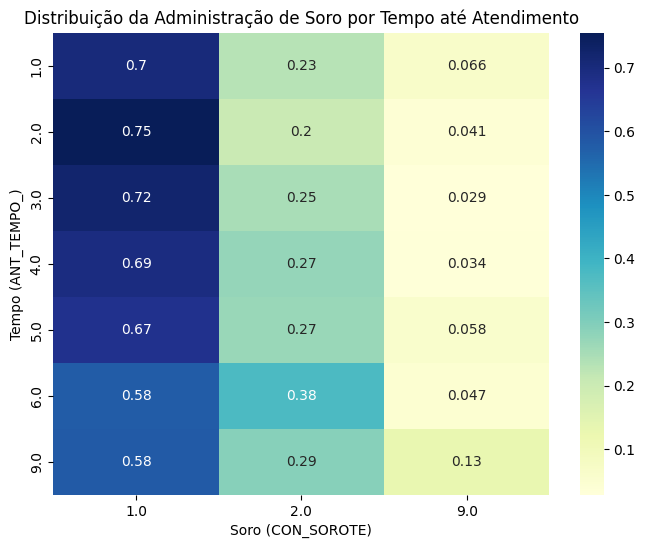

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(soro_tempo_N, annot=True, cmap="YlGnBu")
plt.title("Distribuição da Administração de Soro por Tempo até Atendimento")
plt.ylabel("Tempo (ANT_TEMPO_)")
plt.xlabel("Soro (CON_SOROTE)")
plt.show()


In [ ]:
soro_tempo_N2 = pd.crosstab(df['ANT_TEMPO_'], df['CON_SOROTE'], normalize='columns')
soro_tempo_N2

CON_SOROTE,1.0,2.0,9.0
ANT_TEMPO_,,,
1.0,0.498236,0.493411,0.583693
2.0,0.289186,0.236690,0.193844
3.0,0.098079,0.101871,0.048056
4.0,0.028701,0.034133,0.017279
5.0,0.021907,0.026357,0.023218
6.0,0.023823,0.047048,0.024298
9.0,0.040068,0.060490,0.109611


<Axes: title={'center': 'Administração de Soro por Tempo até o Atendimento'}, xlabel='ANT_TEMPO_'>

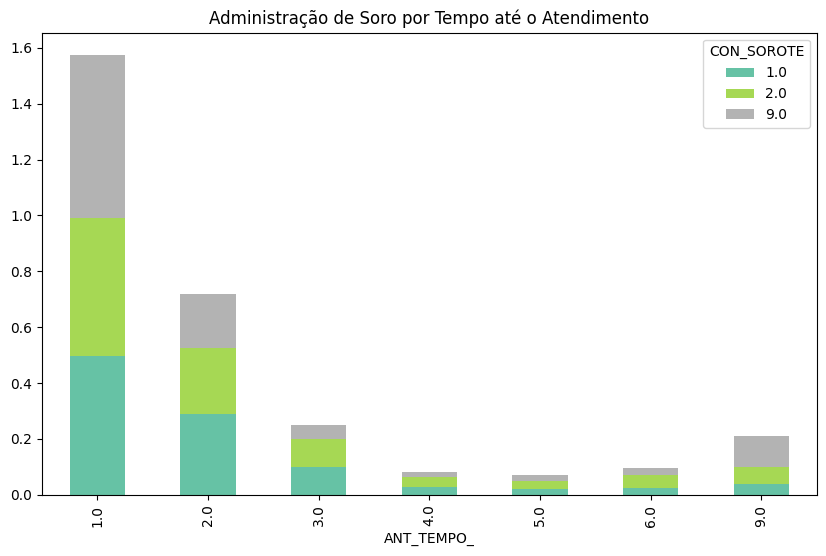

In [ ]:
soro_tempo_N2.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2', title='Administração de Soro por Tempo até o Atendimento')

In [ ]:
soro_rel_casos = (soro_tempo/len(df)) * 100
soro_rel_casos

,Sim,Não,Ignorado
ANT_TEMPO_,,,
0 - 1h,34.596425,11.322467,3.269120
1 - 3h,20.080443,5.431397,1.085675
3 - 6h,6.810415,2.337678,0.269151
6 - 12h,1.992923,0.783258,0.096773
12 - 24h,1.521154,0.604833,0.130039
24h ou mais,1.654217,1.079626,0.136087
Ignorado,2.782230,1.388091,0.613905


In [ ]:
# Transformar o DataFrame para formato longo (long-form)
soro_rel_long = soro_rel_casos.reset_index().melt(
    id_vars='ANT_TEMPO_',
    var_name='Soro',
    value_name='Percentual'
)

# Criar gráfico de barras horizontais empilhadas
fig = px.bar(
    soro_rel_long,
    y='ANT_TEMPO_',
    x='Percentual',
    color='Soro',
    orientation='h',
    text=soro_rel_long['Percentual'].round(2).astype(str) + '%',
    title='Distribuição Percentual dos Casos por Tempo até Atendimento e Administração de Soro',
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Ajustes visuais
fig.update_traces(textposition='inside')
fig.update_layout(
    xaxis_title='Percentual (%)',
    yaxis_title='Tempo entre Picada e Atendimento',
    barmode='stack',
    legend_title='Recebeu Soro'
)

fig.show()


## Perfil dos pacientes


### Idade dos pacientes

In [ ]:
df['NU_IDADE_N'].isna().sum()
df['NU_IDADE_N'].unique()

array([4046, 4028, 4018, 4015, 4006, 4012, 4041, 4032, 4050, 4025, 4051,
       4058, 4009, 4048, 4064, 4030, 4023, 4019, 4014, 4036, 4044, 4027,
       4043, 4016, 4033, 4061, 4069, 4017, 4052, 4026, 4034, 4049, 2000,
       4072, 4031, 4024, 4037, 4022, 4045, 4003, 4076, 4004, 4013, 4040,
       4062, 4020, 4011, 4039, 4056, 4053, 4055, 4054, 4007, 4005, 4021,
       4077, 4029, 4047, 4035, 4008, 4060, 4066, 4059, 4042, 4074, 4081,
       4057, 4067, 4038, 4065, 4063, 4070, 4082, 4001, 4079, 4010, 4068,
       4002, 4071, 3002, 2015, 4080, 4078, 3006, 4084, 3004, 4073, 4075,
       3010, 4099, 4083, 4088, 3011, 2027, 2009, 2005, 4087, 3005, 4000,
       3003,   28, 3001, 3007, 3008, 4085, 2018, 4091, 4090, 4086, 4092,
       2023, 2004, 2024, 2001, 2021, 2003, 2011, 4094, 2008, 3009, 2017,
       2028, 4089, 3013, 4098, 2019, 4093, 2013, 2020, 2010, 2025, 4095,
       2002, 4096, 2007, 2016, 4097])

In [ ]:
# Converter para string e manter apenas os que têm 4 dígitos
df = df[df['NU_IDADE_N'].astype(str).str.match(r'^\d{4}$')]

In [ ]:
df['NU_IDADE_N'].isna().sum()
df['NU_IDADE_N'].unique()

array([4046, 4028, 4018, 4015, 4006, 4012, 4041, 4032, 4050, 4025, 4051,
       4058, 4009, 4048, 4064, 4030, 4023, 4019, 4014, 4036, 4044, 4027,
       4043, 4016, 4033, 4061, 4069, 4017, 4052, 4026, 4034, 4049, 2000,
       4072, 4031, 4024, 4037, 4022, 4045, 4003, 4076, 4004, 4013, 4040,
       4062, 4020, 4011, 4039, 4056, 4053, 4055, 4054, 4007, 4005, 4021,
       4077, 4029, 4047, 4035, 4008, 4060, 4066, 4059, 4042, 4074, 4081,
       4057, 4067, 4038, 4065, 4063, 4070, 4082, 4001, 4079, 4010, 4068,
       4002, 4071, 3002, 2015, 4080, 4078, 3006, 4084, 3004, 4073, 4075,
       3010, 4099, 4083, 4088, 3011, 2027, 2009, 2005, 4087, 3005, 4000,
       3003, 3001, 3007, 3008, 4085, 2018, 4091, 4090, 4086, 4092, 2023,
       2004, 2024, 2001, 2021, 2003, 2011, 4094, 2008, 3009, 2017, 2028,
       4089, 3013, 4098, 2019, 4093, 2013, 2020, 2010, 2025, 4095, 2002,
       4096, 2007, 2016, 4097])

In [ ]:
def classificar_faixa(valor):
    try:
        valor = int(valor)
        unidade = int(str(valor)[0])
        numero = int(str(valor)[1:])

        # Converter tudo para idade em anos
        if unidade == 1:
            idade = numero / (24 * 365)
        elif unidade == 2:
            idade = numero / 365
        elif unidade == 3:
            idade = numero / 12
        elif unidade == 4:
            idade = numero
        else:
            return "Ignorado"

        # Classificação em faixas de 10 em 10 anos
        if idade < 10:
            return "0-9 anos"
        elif idade < 20:
            return "10-19 anos"
        elif idade < 30:
            return "20-29 anos"
        elif idade < 40:
            return "30-39 anos"
        elif idade < 50:
            return "40-49 anos"
        elif idade < 60:
            return "50-59 anos"
        elif idade < 70:
            return "60-69 anos"
        elif idade < 80:
            return "70-79 anos"
        elif idade < 90:
            return "80-89 anos"
        elif idade < 100:
            return "90-99 anos"
        else:
            return "100 anos ou mais"
    except:
        return "Ignorado"

In [ ]:
df['faixa_etaria'] = df['NU_IDADE_N'].apply(classificar_faixa)

In [ ]:
casos_idade = pd.crosstab(index=df['faixa_etaria'], columns='Frequência').reset_index()
casos_idade

col_0,faixa_etaria,Frequência
0,0-9 anos,2109
1,10-19 anos,4021
2,20-29 anos,5147
3,30-39 anos,5691
4,40-49 anos,5850
5,50-59 anos,5238
6,60-69 anos,3335
7,70-79 anos,1341
8,80-89 anos,310
9,90-99 anos,24


In [ ]:
# Gráfico de pizza
fig = px.pie(
    casos_idade,
    names='faixa_etaria',
    values='Frequência',
    title="Distribuição de Casos por Faixa Etária",
    color_discrete_sequence=px.colors.qualitative.Safe
)
fig.show()

In [ ]:
tabela_evolucao = pd.crosstab(df['faixa_etaria'], df['EVOLUCAO'])
tabela_evolucao

EVOLUCAO,1,2,3,9
faixa_etaria,,,,
0-9 anos,1826,4,1,128
10-19 anos,3540,5,1,210
20-29 anos,4537,3,0,287
30-39 anos,4979,7,0,338
40-49 anos,5134,10,1,307
50-59 anos,4519,19,3,346
60-69 anos,2904,22,3,167
70-79 anos,1155,23,2,70
80-89 anos,269,5,1,19


In [ ]:
tab_evol = pd.crosstab(df['faixa_etaria'], df['EVOLUCAO'], normalize='index')
tab_evol

EVOLUCAO,1,2,3,9
faixa_etaria,,,,
0-9 anos,0.932108,0.002042,0.000510,0.065339
10-19 anos,0.942492,0.001331,0.000266,0.055911
20-29 anos,0.939921,0.000622,0.000000,0.059457
30-39 anos,0.935199,0.001315,0.000000,0.063486
40-49 anos,0.941673,0.001834,0.000183,0.056310
50-59 anos,0.924698,0.003888,0.000614,0.070800
60-69 anos,0.937984,0.007106,0.000969,0.053941
70-79 anos,0.924000,0.018400,0.001600,0.056000
80-89 anos,0.914966,0.017007,0.003401,0.064626


In [ ]:
# Mapeamento para legenda
evolucao_dict = {
    1: 'Cura',
    2: 'Óbito por acidente',
    3: 'Óbito por outras causas',
    9: 'Ignorado'
}

# Converter EVOLUCAO para numérico (forçando erro para NaN), preencher com 9 e converter para int
df['EVOLUCAO'] = pd.to_numeric(df['EVOLUCAO'], errors='coerce').fillna(9).astype(int)

# Criar tabela cruzada
tabela_evolucao = pd.crosstab(df['faixa_etaria'], df['EVOLUCAO'])

# Renomear colunas com base no dicionário
tabela_evolucao = tabela_evolucao.rename(columns=evolucao_dict)

# Converter para formato longo
tabela_long = tabela_evolucao.reset_index().melt(
    id_vars='faixa_etaria',
    var_name='Evolução',
    value_name='Frequência'
)

# Ordem desejada para faixa etária
ordem_idade = [
    '0-9 anos', '10-19 anos', '20-29 anos', '30-39 anos', '40-49 anos',
    '50-59 anos', '60-69 anos', '70-79 anos', '80-89 anos', '90-99 anos',
    '100 anos ou mais'
]

# Garantir que faixa_etaria está como categoria ordenada
tabela_long['faixa_etaria'] = pd.Categorical(
    tabela_long['faixa_etaria'],
    categories=ordem_idade,
    ordered=True
)

# Gráfico com ordem forçada no eixo x
fig = px.bar(
    tabela_long,
    x='faixa_etaria',
    y='Frequência',
    color='Evolução',
    title='Distribuição dos Desfechos por Faixa Etária',
    labels={'faixa_etaria': 'Faixa Etária'},
    color_discrete_sequence=px.colors.qualitative.Safe,
    category_orders={'faixa_etaria': ordem_idade}  # <- ordem explícita!
)
fig.update_layout(barmode='group')
fig.show()
fig.show()


In [ ]:
df['EVOLUCAO'] = pd.to_numeric(df['EVOLUCAO'], errors='coerce').astype('Int64')

# Filtrar apenas os óbitos (EVOLUCAO == 2)
df_obitos = df[df['EVOLUCAO'] == 2]

# Tabela de frequência de óbitos por faixa etária
tab_obt_idade = pd.crosstab(index=df_obitos['faixa_etaria'],
                            columns='Óbitos',
                            dropna=False)

tab_obt_idade.reset_index()

col_0,faixa_etaria,Óbitos
0,0-9 anos,4
1,10-19 anos,5
2,20-29 anos,3
3,30-39 anos,7
4,40-49 anos,10
5,50-59 anos,19
6,60-69 anos,22
7,70-79 anos,23
8,80-89 anos,5
9,90-99 anos,2


In [ ]:
# Garantir que 'faixa_etaria' é uma coluna
if 'faixa_etaria' not in tab_obt_idade.columns:
    tab_obt_idade = tab_obt_idade.reset_index()

# Gráfico de pizza
fig = px.pie(
    tab_obt_idade,
    names='faixa_etaria',
    values='Óbitos',
    title="Distribuição Percentual de Óbitos por Faixa Etária",
    color_discrete_sequence=px.colors.qualitative.Safe,
)


fig.show()

In [ ]:
# Garantir que os índices estejam alinhados
tab_obt_idade = tab_obt_idade.copy()
casos_idade = casos_idade.copy()

tab_obt_idade = tab_obt_idade.set_index('faixa_etaria')
casos_idade = casos_idade.set_index('faixa_etaria')

# Calcular o percentual de óbitos por faixa etária
tab_obt_idade['Percentual'] = (
    tab_obt_idade['Óbitos'] * 100 / casos_idade['Frequência']
)

# Formatar o percentual com 3 casas decimais e adicionar símbolo %
tab_obt_idade['Label'] = tab_obt_idade['Percentual'].apply(lambda x: f'{x:.3f}%')

# Resetar o índice para facilitar visualização e uso no gráfico
tab_obt_idade = tab_obt_idade.reset_index()

# Visualizar tabela final
tab_obt_idade

col_0,faixa_etaria,Óbitos,Percentual,Label
0,0-9 anos,4,0.189663,0.190%
1,10-19 anos,5,0.124347,0.124%
2,20-29 anos,3,0.058286,0.058%
3,30-39 anos,7,0.123001,0.123%
4,40-49 anos,10,0.170940,0.171%
5,50-59 anos,19,0.362734,0.363%
6,60-69 anos,22,0.659670,0.660%
7,70-79 anos,23,1.715138,1.715%
8,80-89 anos,5,1.612903,1.613%
9,90-99 anos,2,8.333333,8.333%


In [ ]:
tab_obt_idade['faixa_etaria'] = pd.Categorical(
    tab_obt_idade['faixa_etaria'],
    categories=ordem_idade,
    ordered=True
)

# Gráfico de barras
fig = px.bar(
    tab_obt_idade.sort_values('faixa_etaria'),
    x='faixa_etaria',
    y='Percentual',
    text='Label',
    title='Letalidade por Faixa Etária (%)',
    labels={'faixa_etaria': 'Faixa Etária', 'Percentual': 'Letalidade (%)'},
    color_discrete_sequence=px.colors.qualitative.Safe, # vermelho escuro, cor de alerta
)

fig.update_traces(textposition='outside')
fig.update_layout(yaxis_title='Letalidade (%)', xaxis_title='Faixa Etária')

fig.show()


In [ ]:
# Criar uma cópia do DataFrame original para não modificar df diretamente
casos_grupo = df.copy()

# Extrair a idade mínima da faixa etária (ex: '10 a 14' → 10)
casos_grupo['idade_min'] = casos_grupo['faixa_etaria'].str.extract(r'(\d+)').astype(float)

# Classificar em grupos etários personalizados
casos_grupo['grupo_etario'] = np.select(
    condlist=[
        casos_grupo['idade_min'] <= 19,
        casos_grupo['idade_min'] >= 60
    ],
    choicelist=[
        'Crianças e Adolescentes',
        'Idosos'
    ],
    default='Adultos'
)

obitos_grupo = casos_grupo.copy()
casos_grupo = pd.crosstab(index=casos_grupo['grupo_etario'], columns='Frequência').reset_index()
casos_grupo

col_0,grupo_etario,Frequência
0,Adultos,21926
1,Crianças e Adolescentes,6130
2,Idosos,5010


In [ ]:
# Gráfico de pizza
fig = px.pie(
    casos_grupo,
    names='grupo_etario',
    values='Frequência',
    title="Frequência de acidentes por grupo etário",
    color_discrete_sequence=px.colors.qualitative.Safe,
)
fig.show()

In [ ]:
# Filtrar apenas os óbitos (EVOLUCAO == 2)
obitos_grupo = obitos_grupo[obitos_grupo['EVOLUCAO'] == 2]

# Tabela de frequência de óbitos por faixa etária
tab_obt_grupo = pd.crosstab(index=obitos_grupo['grupo_etario'],
                            columns='Óbitos',
                            dropna=False).reset_index()

tab_obt_grupo

col_0,grupo_etario,Óbitos
0,Adultos,39
1,Crianças e Adolescentes,9
2,Idosos,52


In [ ]:
# Garantir cópia dos DataFrames e alinhamento de índice
tab_obt_grupo = tab_obt_grupo.copy()
casos_grupo = casos_grupo.copy()

# Garantir que ambos estejam indexados por 'grupo_etario'
tab_obt_grupo = tab_obt_grupo.set_index('grupo_etario')
casos_grupo = casos_grupo.set_index('grupo_etario')

# Calcular o percentual de óbitos por grupo etário
tab_obt_grupo['Percentual'] = (
    tab_obt_grupo['Óbitos'] * 100 / casos_grupo['Frequência']
)

# Formatar percentual com 3 casas decimais e símbolo %
tab_obt_grupo['Label'] = tab_obt_grupo['Percentual'].apply(lambda x: f'{x:.3f}%')

# Resetar índice para facilitar visualização e uso em gráficos
tab_obt_grupo = tab_obt_grupo.reset_index()

# Exibir a tabela final
tab_obt_grupo

col_0,grupo_etario,Óbitos,Percentual,Label
0,Adultos,39,0.177871,0.178%
1,Crianças e Adolescentes,9,0.146819,0.147%
2,Idosos,52,1.037924,1.038%


In [ ]:
# Reforçar o tipo de dado como string (se perdeu no processo anterior)
tab_obt_grupo['grupo_etario'] = tab_obt_grupo['grupo_etario'].astype(str)

# Definir a ordem correta das categorias
ordem_grupo = ['Crianças e Adolescentes', 'Adultos', 'Idosos']
tab_obt_grupo['grupo_etario'] = pd.Categorical(
    tab_obt_grupo['grupo_etario'],
    categories=ordem_grupo,
    ordered=True
)

# Gráfico de barras com Plotly
fig = px.bar(
    tab_obt_grupo.sort_values('grupo_etario'),
    x='grupo_etario',
    y='Percentual',
    text='Label',
    title='Letalidade por Grupo Etário (%)',
    labels={'grupo_etario': 'Grupo Etário', 'Percentual': 'Letalidade (%)'},
    color_discrete_sequence=px.colors.qualitative.Safe
)

fig.update_traces(textposition='outside')
fig.update_layout(yaxis_title='Letalidade (%)', xaxis_title='Grupo Etário')

fig.show()


### Raça/Cor

In [ ]:
tab_raca = pd.crosstab(index=df['CS_RACA'], columns='Frequência').reset_index()
tab_raca

col_0,CS_RACA,Frequência
0,1.0,19726
1,2.0,2011
2,3.0,314
3,4.0,7939
4,5.0,216
5,9.0,2146


In [ ]:
# Dicionário de mapeamento dos códigos
raca_dict = {
    1: 'Branca',
    2: 'Preta',
    3: 'Amarela',
    4: 'Parda',
    5: 'Indígena',
    9: 'Ignorado'
}

# Aplicar o mapeamento à coluna
tab_raca['Raça/Cor'] = tab_raca['CS_RACA'].map(raca_dict)


In [ ]:
fig = px.pie(
    tab_raca,
    names='Raça/Cor',
    values='Frequência',
    title='Distribuição de Casos por Raça/Cor',
    color_discrete_sequence=px.colors.qualitative.Safe
)

fig.update_traces(textinfo='percent+label', textposition='inside')
fig.show()

In [ ]:
df_obt = df.copy()
df_obt = df_obt[df_obt['EVOLUCAO'] == 2]
df_obt_raca = pd.crosstab(index=df_obt['CS_RACA'], columns='Frequência').reset_index()
df_obt_raca

col_0,CS_RACA,Frequência
0,1.0,70
1,2.0,7
2,3.0,1
3,4.0,15
4,9.0,3


In [ ]:
df_obt_raca['Percentual'] = df_obt_raca['Frequência'] * 100 / tab_raca['Frequência']
df_obt_raca['Label'] = df_obt_raca['Percentual'].apply(lambda x: f'{x:.3f}%')
df_obt_raca['Raca'] = df_obt_raca['CS_RACA'].map(raca_dict)
df_obt_raca

col_0,CS_RACA,Frequência,Percentual,Label,Raca
0,1.0,70,0.354862,0.355%,Branca
1,2.0,7,0.348086,0.348%,Preta
2,3.0,1,0.318471,0.318%,Amarela
3,4.0,15,0.188941,0.189%,Parda
4,9.0,3,1.388889,1.389%,Ignorado


In [ ]:
# Criar gráfico de barras
fig = px.bar(
    df_obt_raca,
    x='Raca',
    y='Percentual',
    title='Letalidade por Raça/Cor (%)',
    labels={'Percentual': 'Letalidade (%)', 'Raca': 'Raça/Cor'},
    color_discrete_sequence=px.colors.qualitative.Safe
)


fig.show()

### Gênero

In [ ]:
genero_abs = pd.crosstab(index=df['CS_SEXO'], columns='Frequência').reset_index()
genero_abs

col_0,CS_SEXO,Frequência
0,F,7479
1,I,15
2,M,25572


In [ ]:
# Gráfico de pizza
fig = px.pie(
    genero_abs,
    names='CS_SEXO',
    values='Frequência',
    title="Distribuição de Casos por Gênero",
    color_discrete_sequence=px.colors.qualitative.Safe
)
fig.show()

In [ ]:
# População estimada do estado de SP por sexo (fonte: https://censo2022.ibge.gov.br/panorama/)
populacao_sp = {
    'M': 23014862,
    'F': 21396376
}

# Calcular taxa por 100 mil habitantes
genero_abs['Populacao_SP'] = genero_abs['CS_SEXO'].map(populacao_sp)
genero_abs['Taxa_por_100k'] = (genero_abs['Frequência'] / genero_abs['Populacao_SP']) * 100000

# Gráfico de pizza com taxas
fig = px.pie(
    genero_abs,
    names='CS_SEXO',
    values='Taxa_por_100k',
    title="Taxa de Acidentes com Animais Peçonhentos por Gênero em SP (por 100 mil habitantes)",
    color_discrete_sequence=px.colors.qualitative.Safe
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
genero_abs

col_0,CS_SEXO,Frequência,Populacao_SP,Taxa_por_100k
0,F,7479,21396376.0,34.954518
1,I,15,NaN,NaN
2,M,25572,23014862.0,111.110812


### Grávidas

In [ ]:
pd.crosstab(index=df['CS_GESTANT'], columns='Frequência').reset_index()

col_0,CS_GESTANT,Frequência
0,1.0,34
1,2.0,49
2,3.0,27
3,4.0,12
4,5.0,4628
5,6.0,27355
6,9.0,959


In [ ]:
df['Gesta_status'] = df['CS_GESTANT'].apply(
    lambda x: 'Não' if x in [5, 6, 9] else 'Sim'
)

In [ ]:
tabela_ges = pd.crosstab(index=df['Gesta_status'], columns='Frequência').reset_index()
tabela_ges


col_0,Gesta_status,Frequência
0,Não,32942
1,Sim,124


In [ ]:
df_gest = df.copy()
df_gest = df_gest[df_gest['Gesta_status'] == 'Sim']
pd.crosstab(index=df_gest['EVOLUCAO'], columns='Frequência').reset_index()

col_0,EVOLUCAO,Frequência
0,1,103
1,9,21


Não há registro de morte por animais peçonhentos em gestantes

### Escolaridade

In [ ]:
escol = pd.crosstab(index=df['CS_ESCOL_N'], columns='Frequência').reset_index()
escol

col_0,CS_ESCOL_N,Frequência
0,0.0,522
1,1.0,3428
2,2.0,2034
3,3.0,4095
4,4.0,2260
5,5.0,2015
6,6.0,3703
7,7.0,402
8,8.0,682
9,9.0,8946


In [ ]:
# Agrupar 0.0, 9.0 e 10.0 como 9.0 (Ignorado)
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].replace({0.0: 9.0, 10.0: 9.0})

# Gerar nova crosstab
escol = pd.crosstab(index=df['CS_ESCOL_N'], columns='Frequência').reset_index()

# Mapear os códigos para rótulos legíveis
escolaridade_dict = {
    1.0: '1ª a 4ª série incompleta',
    2.0: '4ª série completa',
    3.0: '5ª a 8ª série incompleta',
    4.0: 'Ensino fund. completo',
    5.0: 'Ensino médio incompleto',
    6.0: 'Ensino médio completo',
    7.0: 'Superior incompleto',
    8.0: 'Superior completo',
    9.0: 'Ignorado'
}

escol['Escolaridade'] = escol['CS_ESCOL_N'].map(escolaridade_dict)

escol

col_0,CS_ESCOL_N,Frequência,Escolaridade
0,1.0,3428,1ª a 4ª série incompleta
1,2.0,2034,4ª série completa
2,3.0,4095,5ª a 8ª série incompleta
3,4.0,2260,Ensino fund. completo
4,5.0,2015,Ensino médio incompleto
5,6.0,3703,Ensino médio completo
6,7.0,402,Superior incompleto
7,8.0,682,Superior completo
8,9.0,10800,Ignorado


In [ ]:
ordem_escolaridade = [
    '1ª a 4ª série incompleta',
    '4ª série completa',
    '5ª a 8ª série incompleta',
    'Ensino fund. completo',
    'Ensino médio incompleto',
    'Ensino médio completo',
    'Superior incompleto',
    'Superior completo',
    'Ignorado'
]


fig = px.pie(
    escol,
    names='Escolaridade',
    values='Frequência',
    title='Distribuição de Casos por Escolaridade',
    color_discrete_sequence=px.colors.qualitative.Safe,
    category_orders={'Escolaridade': ordem_escolaridade}
)

fig.update_traces(textinfo='percent+label', textposition='inside')
fig.show()



In [ ]:
df_escol = df.copy()
df_escol = df_escol[df_escol['EVOLUCAO'] == 2]
escol_obt = pd.crosstab(index=df_escol['CS_ESCOL_N'], columns='Frequência').reset_index()
escol_obt['Escolaridade'] = escol_obt['CS_ESCOL_N'].map(escolaridade_dict)
escol_obt

col_0,CS_ESCOL_N,Frequência,Escolaridade
0,1.0,11,1ª a 4ª série incompleta
1,2.0,5,4ª série completa
2,3.0,13,5ª a 8ª série incompleta
3,4.0,4,Ensino fund. completo
4,5.0,2,Ensino médio incompleto
5,6.0,7,Ensino médio completo
6,7.0,1,Superior incompleto
7,8.0,2,Superior completo
8,9.0,44,Ignorado


In [ ]:
escol_obt['Percentual'] = escol_obt['Frequência'] * 100 / escol['Frequência']
escol_obt['Label'] = escol_obt['Percentual'].apply(lambda x: f'{x:.3f}%')
escol_obt

col_0,CS_ESCOL_N,Frequência,Escolaridade,Percentual,Label
0,1.0,11,1ª a 4ª série incompleta,0.320887,0.321%
1,2.0,5,4ª série completa,0.245821,0.246%
2,3.0,13,5ª a 8ª série incompleta,0.317460,0.317%
3,4.0,4,Ensino fund. completo,0.176991,0.177%
4,5.0,2,Ensino médio incompleto,0.099256,0.099%
5,6.0,7,Ensino médio completo,0.189036,0.189%
6,7.0,1,Superior incompleto,0.248756,0.249%
7,8.0,2,Superior completo,0.293255,0.293%
8,9.0,44,Ignorado,0.407407,0.407%


In [ ]:
fig = px.bar(
    escol_obt,
    x='Escolaridade',
    y='Percentual',
    title='Letalidade por Escolaridade (%)',
    labels={'Percentual': 'Percentual de letalidade', 'Escolaridade': 'Nível de Escolaridade'},
    color_discrete_sequence=px.colors.qualitative.Safe
)


fig.show()


### Acidente de trabalho

In [ ]:
# Dicionário de legenda para "Relacionado ao Trabalho"
trab_legend = {
    1: "Sim",
    2: "Não",
    9: "Ignorado"
}

# Converter a coluna para tipo numérico (necessário para evitar erros de mapeamento)
df['DOENCA_TRA'] = pd.to_numeric(df['DOENCA_TRA'], errors='coerce')

# Substituir os valores na coluna pelo texto correspondente usando o dicionário
df['DOENCA_TRA'] = df['DOENCA_TRA'].map(trab_legend)

# Garantir que os valores existentes estejam mapeados corretamente
print("Valores únicos após mapeamento:")
print(df['DOENCA_TRA'].value_counts())

# Agrupando os dados por "Relacionado ao Trabalho" e contando os casos
filtered_data = df.groupby(["DOENCA_TRA"]).size().reset_index(name="Casos")

# Criando o gráfico de barras para visualizar os casos relacionados ao trabalho
fig = px.bar(
    filtered_data,
    x="DOENCA_TRA",
    y="Casos",
    title="Casos relacionados ao trabalho",
    labels={"Casos": "Número de Casos", "DOENCA_TRA": "Relacionado ao Trabalho"},
    color_discrete_sequence=px.colors.qualitative.Safe
)
fig.show()


Valores únicos após mapeamento:
DOENCA_TRA
Não         22169
Sim          6703
Ignorado     2710
Name: count, dtype: int64
